대만 -> 0
러시아 -> 1
말레이시아 -> 2
미국 -> 3
베트남 -> 4
싱가포르 -> 5
싱가폴 -> 6
영국 -> 7
오스트레일리아 -> 8
일본 -> 9
중국 -> 10
태국 -> 11
홍콩 -> 12


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,국가_인코딩,소비현황,pca_x,pca_y,cluster
0,-1.520804,-0.270685,-1.266774,0.883968,4
1,-1.275842,-0.461219,-1.228288,0.576026,4
2,-0.785919,0.161492,-0.441536,0.669921,4
3,-0.051034,-0.565063,-0.435646,-0.363474,1
4,0.193928,-0.493813,-0.212050,-0.486306,1
5,0.683852,1.097451,1.259571,0.292459,0
6,0.928813,5.224293,4.350903,3.037363,3
7,1.173775,-0.575060,0.423355,-1.236613,2
8,1.418737,-0.470181,0.670730,-1.335666,2
9,-1.520804,-0.165022,-1.192059,0.958683,4


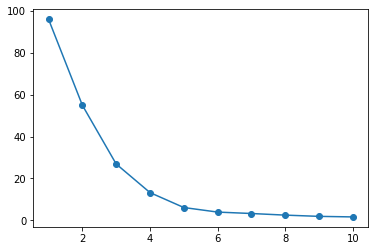

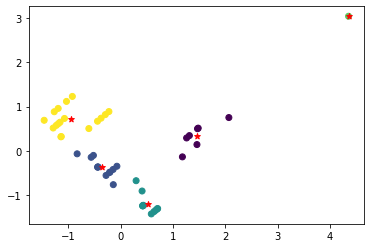

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


df = pd.read_csv('./Data/부산_국적별소비현황.csv')


#### 인코딩
encoder = LabelEncoder() # 인코더 생성
encoder.fit(df['국가']) # 인코더에 국가 Serise fit
encoder.transform(df['국가']) # str -> 숫자로 변경

# 변경 결과 확인
for i, label in enumerate(encoder.classes_):
    print(label, '->', i)

# 인코딩 결과 DataFrame에 넣기
df['국가_인코딩'] = encoder.transform(df['국가'])


#### 스케일링
list_scale = df[['국가_인코딩', '소비현황']] # 스케이링 할 Serise만 선택
scaler = StandardScaler() # 스케일러 생성
scaler.fit(list_scale) # 스케일러 fit
scaled = scaler.transform(list_scale) # 스케일 변환

# 스케일링 후 DataFrame 생성
df_scaled = pd.DataFrame(data=scaled, columns=['국가_인코딩', '소비현황'])



#### 차원축소
pca = PCA(n_components=2) # PCA 생성
pca_transform = pca.fit_transform(df_scaled) # fit 과 변환 동시에

df_scaled['pca_x'] = pca_transform[:, 0]
df_scaled['pca_y'] = pca_transform[:, 1]


#### 군집

# 군집 개수 구하기
inertias = [] # 응집도 넣을 빈 리스트 생성
for i in range(1, 11):
    test = KMeans(n_clusters=i, init='k-means++')
    test.fit(df_scaled[['pca_x', 'pca_y']])
    inertias.append(test.inertia_)

# 군집 개수 시각화
plt.figure()
plt.plot(range(1, 11), inertias, '-o')


# 군집
model = KMeans(n_clusters=5, init='k-means++') # 군집 모델 생성
model.fit(df_scaled[['pca_x', 'pca_y']]) # 군집 모델 학습

model_center = model.cluster_centers_ # 군집 중심값 구하기

df_scaled['cluster'] = model.labels_


#### 군집 시각화
plt.figure()
plt.scatter(df_scaled['pca_x'], df_scaled['pca_y'], c=df_scaled['cluster'])
plt.scatter(model_center[:, 0], model_center[:, 1], c='r', marker='*')

plt.figure()
df_scaled